In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine

X, y = load_wine(return_X_y = True)

In [2]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [4]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

#### Printing the decision tree

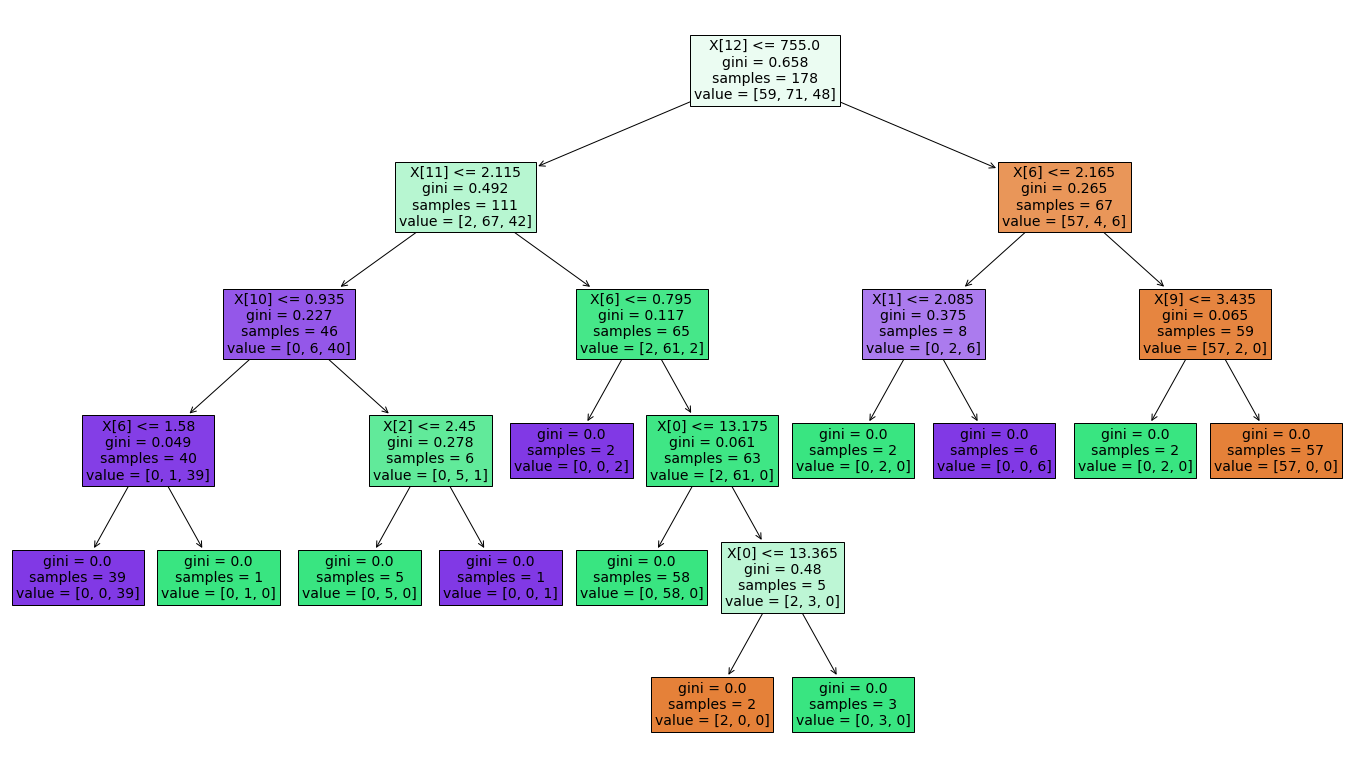

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,14))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

The model keeps splitting the nodes until all the nodes are pure (i.e. contain samples from only one class).

We usually do not want a tree with all pure leaf nodes. It would be too specific and likely to overfit.

# Hyperparameters

#### min_impurity_decrease

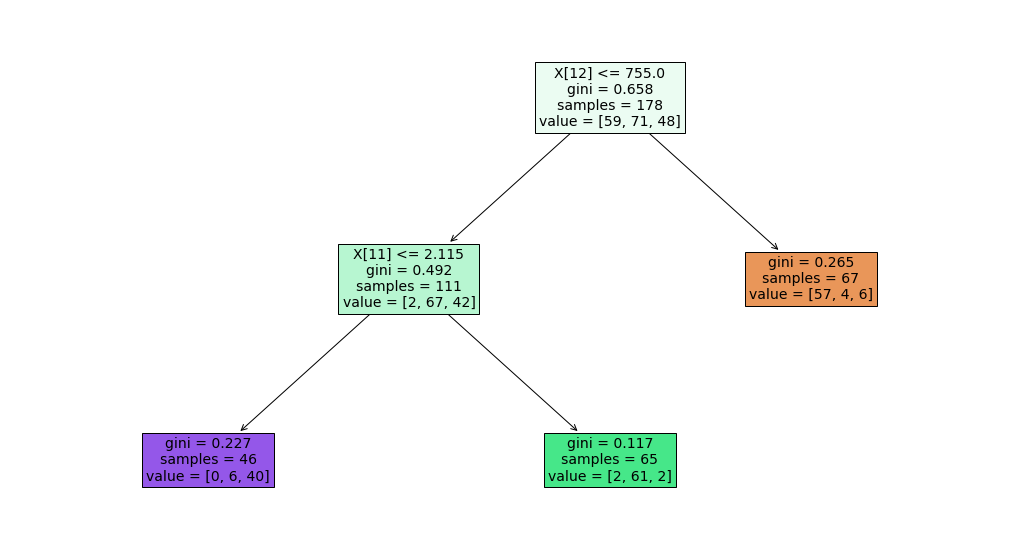

In [6]:
clf = tree.DecisionTreeClassifier(min_impurity_decrease=0.2)
clf.fit(X, y)
plt.figure(figsize=(18,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

We now have a much smaller tree. Consider the green node at the bottom. It contains 65 samples and 61 of them belong to one class. There is no need to further split that node because we can afford to have 4 misclassified samples out of 65. If we keep splitting that node, the model will probably be overfitting.¶ Another hyperparameter to control the depth of a tree is max_depth.

It does not make any calculations regarding impurity or sample ratio.

The model stops splitting when max_depth is reached.

#### max_depth

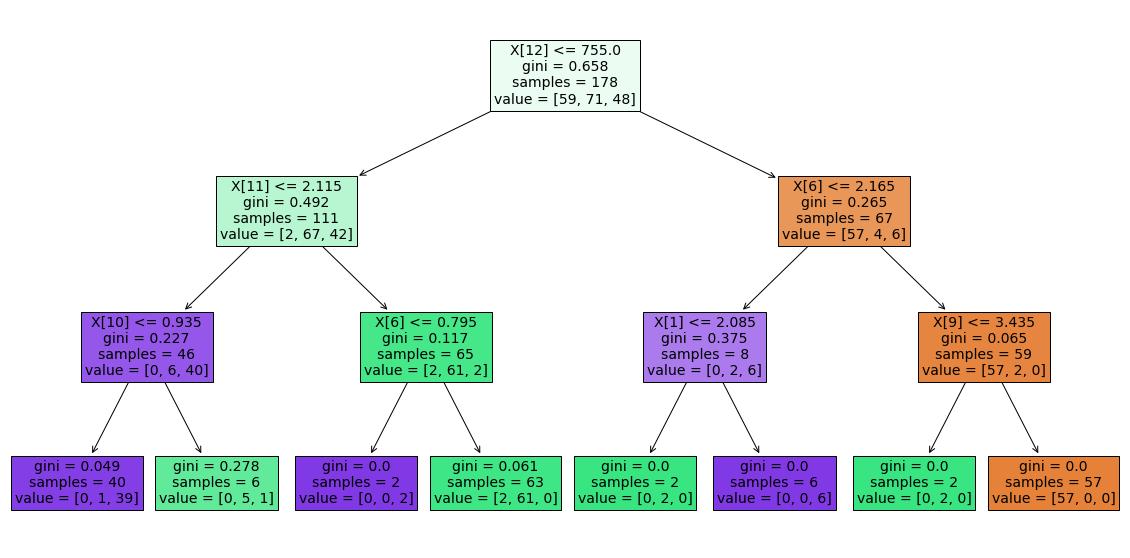

In [7]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

#### min_samples_leaf 

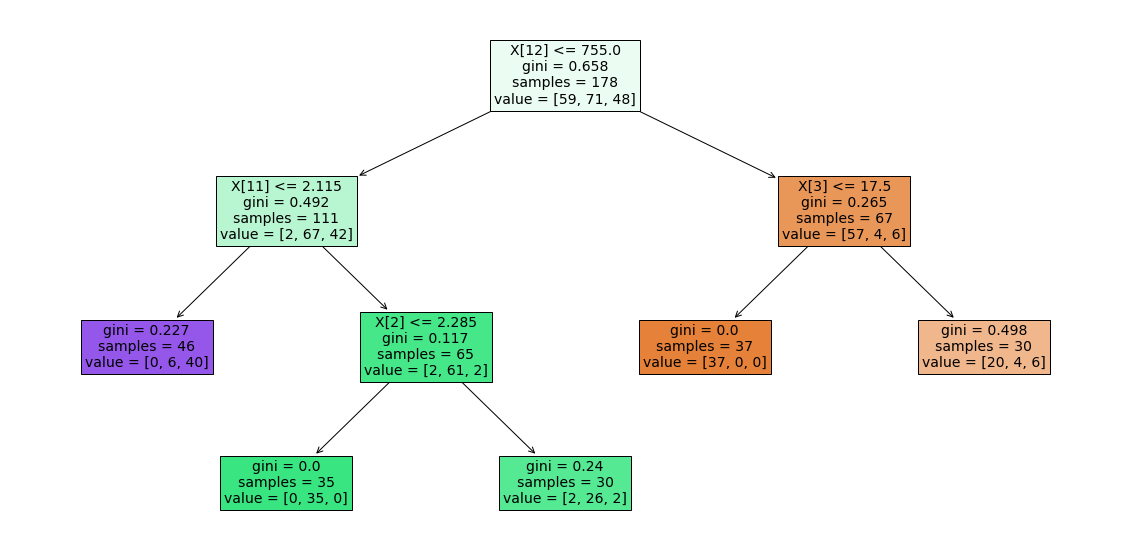

In [8]:
clf = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=30)
clf.fit(X, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

#### max_leaf_nodes

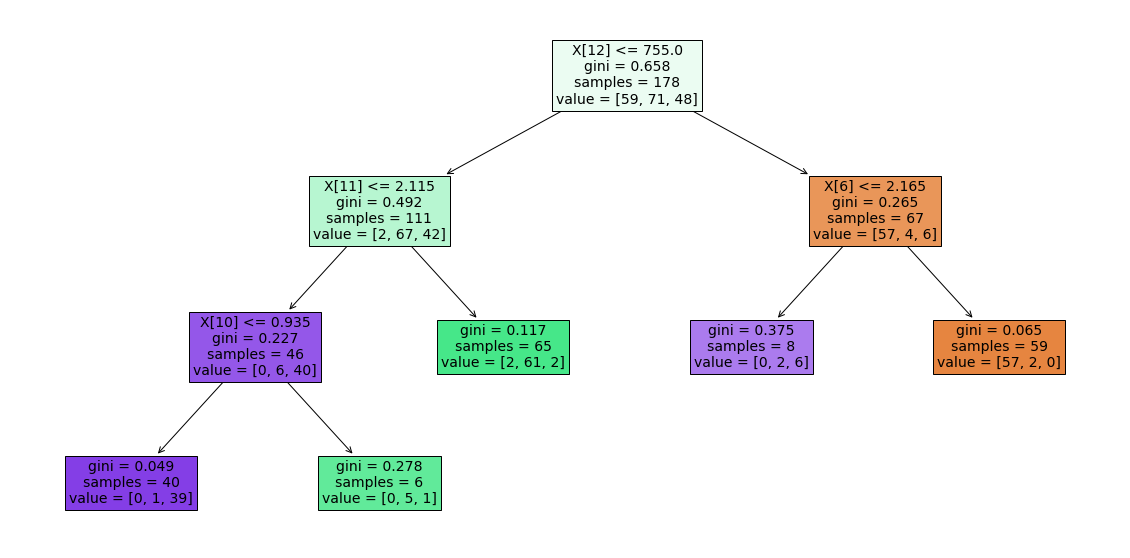

In [9]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=5)
clf.fit(X, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

## Decision Tree Use Case

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/HR.csv')

In [11]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
df.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [13]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [14]:
df=df.rename(columns = {'sales':'department'})

In [15]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [16]:
#reducing the number of categories

import numpy as np
df['department']=np.where(df['department'] =='support', 'technical', df['department'])
df['department']=np.where(df['department'] =='IT', 'technical', df['department'])

In [17]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

In [18]:
#creating dummy variables

#There are two categorical variables in the dataset and they need to be converted to dummy variables 
#before they can be used for modelling.

cat_vars=['department','salary']
for var in cat_vars:
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1

In [19]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0


In [20]:
df.drop(df.columns[[8, 9]], axis=1, inplace=True)

In [21]:
df_vars=df.columns.values.tolist()
y=['left']
X=[i for i in df_vars if i not in y]

In [22]:
import sklearn
print(sklearn.__version__)

1.0.1


In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model,  n_features_to_select=10)
rfe = rfe.fit(df[X], df[y])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when

[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
cols = []
for i in range(len(X)):    
    if rfe.ranking_[i] == 1:
               cols.append(X[i])
cols

['satisfaction_level',
 'last_evaluation',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department_RandD',
 'department_hr',
 'department_management',
 'salary_high',
 'salary_low']

In [25]:
X=df[cols]
y=df['left']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.51      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



In [28]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

print(classification_report(y_test, tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3462
           1       0.91      0.96      0.94      1038

    accuracy                           0.97      4500
   macro avg       0.95      0.97      0.96      4500
weighted avg       0.97      0.97      0.97      4500



#### Hyper-Parameter Tuning

In [29]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 

In [30]:
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3,4,5,6,7], 
              "max_features": [3,4,5,6,7,8,9,10], 
              "min_samples_leaf": [1,23,4,5,6,7,8,9,10], 
              "criterion": ["gini", "entropy"]} 

# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier() 

# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist,n_iter=200, cv = 5) 

tree_cv.fit(X, y) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

Tuned Decision Tree Parameters: {'min_samples_leaf': 1, 'max_features': 9, 'max_depth': 7, 'criterion': 'gini'}
Best score is 0.9689309769923307


In [31]:
tree_cv.best_params_

{'min_samples_leaf': 1, 'max_features': 9, 'max_depth': 7, 'criterion': 'gini'}

In [32]:
print(classification_report(y_test, tree_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3462
           1       0.92      0.93      0.92      1038

    accuracy                           0.96      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500

